Integrantes:

Juan David Barreto Gratz

Diego Efraín Mojica Méndez

José Ignacio Suárez Montiel

___________________________________________________________________________________________

1.Desarrolle un programa que implemente el algoritmo de codificación y decodificación de
Huffman, y que calcule la eficiencia del código generado.

In [1]:
import numpy as np
import pandas as pd
import collections as cl
import matplotlib.pyplot as plt
import heapq as heapq
from PIL import Image

def is_leaf(node):
    return node.left is None and node.right is None

class Node:
    def __init__(self, symbol, probability, left=None, right=None):
        self.symbol = symbol
        self.probability = probability
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.probability < other.probability

def generate_huffman_code(tree_node, current_code, huffman_mapping):
    if tree_node is None:
        return

    if is_leaf(tree_node):
        huffman_mapping[tree_node.symbol] = current_code if len(current_code) > 0 else '1'

    generate_huffman_code(tree_node.left, current_code + '0', huffman_mapping)
    generate_huffman_code(tree_node.right, current_code + '1', huffman_mapping)

def decode_tree(node, index, encoded_string):
    if node is None:
        return index

    if is_leaf(node):
        print(node.symbol, end='')
        return index

    index += 1
    node = node.left if encoded_string[index] == '0' else node.right
    return decode_tree(node, index, encoded_string)

def build_huffman_tree(input_text):
    if len(input_text) == 0:
        return

    symbol_probabilities = {symbol: input_text.count(symbol) for symbol in set(input_text)}

    print([(symbol, probability) for symbol, probability in symbol_probabilities.items()])
    nodes = [Node(symbol, probability) for symbol, probability in symbol_probabilities.items()]
    heapq.heapify(nodes)

    while len(nodes) != 1:
        left = heapq.heappop(nodes)
        right = heapq.heappop(nodes)

        total_probability = left.probability + right.probability
        heapq.heappush(nodes, Node(None, total_probability, left, right))

    root_node = nodes[0]

    huffman_codes = {}
    generate_huffman_code(root_node, '', huffman_codes)

    print('Huffman Code:', huffman_codes)
    efficiency_result = calculate_efficiency(symbol_probabilities, huffman_codes, len(input_text))
    print('Input Text:', input_text)

    encoded_string = ''
    for char in input_text:
        encoded_string += huffman_codes.get(char)

    print('Encoded Text:', encoded_string)
    print('Efficiency of the solution:', efficiency_result)
    print('Decoded Text:', end=' ')

    if is_leaf(root_node):
        while root_node.probability > 0:
            print(root_node.symbol, end='')
            root_node.probability = root_node.probability - 1
    else:
        index = -1
        while index < len(encoded_string) - 1:
            index = decode_tree(root_node, index, encoded_string)

def calculate_efficiency(probabilities, huffman_mapping, size):
    entropy = 0
    for symbol in probabilities:
        entropy += -1 * np.sum((probabilities.get(symbol) / size) * np.log2((probabilities.get(symbol) / size)))
        code_length = len(huffman_mapping.get(symbol))
        length_term = np.sum((probabilities.get(symbol) / size) * code_length)

    return entropy / length_term

input_text = 'Las máquinas no pueden pensar'
build_huffman_tree(input_text)


[('q', 1), ('a', 3), ('m', 1), ('á', 1), ('i', 1), ('s', 3), ('u', 2), (' ', 4), ('e', 3), ('r', 1), ('L', 1), ('p', 2), ('n', 4), ('o', 1), ('d', 1)]
Huffman Code: {'a': '000', 's': '001', 'e': '010', 'u': '0110', 'd': '01110', 'o': '01111', ' ': '100', 'm': '10100', 'q': '10101', 'L': '10110', 'i': '10111', 'n': '110', 'p': '1110', 'r': '11110', 'á': '11111'}
Input Text: Las máquinas no pueden pensar
Encoded Text: 10110000001100101001111110101011010111110000001100110011111001110011001001110010110100111001011000100011110
Efficiency of the solution: 21.32335727044184
Decoded Text: Las máquinas no pueden pensar

2.
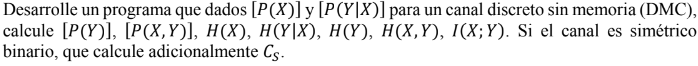

In [2]:
import numpy as np

"""pyx = np.array(
    [[3/4, 1/4,  0.,  0.,  0.],
     [0.,  0., 1/3, 2/3,  0.],
     [0.,  0.,  0.,  0.,  1]])#matriz canal
px = np.array([0.1, 0.5, 0.4])

Ejemplo canal simetrico
"""
p = 0.3
#pyx = np.array([[0.9, 0.1], [0.2, 0.8]])
#pyx = np.array([[0.9, 0.1], [0.1, 0.9]])
pyx = np.array([[0.5, 0.5], [0.5, 0.5]])
px = np.array([0.5, 0.5])


# |P(Y)| = |P(X)| * |P(Y|X)|
py = np.dot(px, pyx)
print("|P(Y)|= {}".format(py))
# |P(X)|diag
pxd = np.diag(px)
print("|P(X)|= {}".format(pxd))
# |P(X,Y)| = |P(X)|diag * |P(Y|X)| 
px_y = np.dot(pxd, pyx)
print("|P(X,Y)|= {}".format(px_y))
# H(X) = -sum(P(X) * log2(P(X))) incertidumbre sobre la entrada del canal previa a observar la salida
hx = -np.sum(px * np.ma.log2(px))
print("|H(X)|= {}".format(hx))
# H(Y) = -sum(P(Y) * log2(P(Y))) 
hy = -np.sum(py * np.ma.log2(py))
print("|H(Y)|= {}".format(hy))
# H(Y|X) = -sum(P(X,Y) * log2(P(Y|X))) como la incertidumbre sobre la salida una vez observada la entrada
hyx = -np.sum(px_y * np.ma.log2(pyx))
print("|H(Y|X)|= {}".format(hyx))
# H(X, Y) = -sum(P(X,Y) * log2(X,Y)) es la incertidumbre promedio del canal completo
hx_y = -np.sum(px_y * np.ma.log2(px_y))
print("|H(X,Y)|= {}".format(hx_y))
# H(X|Y) = H(X,Y) - H(Y) incertidumbre sobre la entrada una vez que hemos observado la salida,
hxy = hx_y - hy
print("|H(X|Y)|= {}".format(hxy))
# I(X,Y) = H(X) - H(X|Y) incertidumbre sobre la entrada que es resuelta al observar la salida del canal
ixy = hx - hxy
print("|I(X;Y)|= {}".format(ixy))
#Canal simetrico
#Si la simetrica de P(Y|X) es igual a P(Y|X) es un canal simetrico binario
pyxT=np.transpose(pyx)
if(np.array_equal(pyxT,pyx)):
    print("El canal es simetrico binario")
    Cs=ixy
    print("El Cs del canal es: {}".format(Cs))
else:
    print("El canal no es simetrico")

|P(Y)|= [0.5 0.5]
|P(X)|= [[0.5 0. ]
 [0.  0.5]]
|P(X,Y)|= [[0.25 0.25]
 [0.25 0.25]]
|H(X)|= 1.0
|H(Y)|= 1.0
|H(Y|X)|= 1.0
|H(X,Y)|= 2.0
|H(X|Y)|= 1.0
|I(X;Y)|= 0.0
El canal es simetrico binario
El Cs del canal es: 0.0


3. Desarrolle un programa que implemente el codificador y decodificador para el código de bloques
lineal sistemático (n, k) = (6,3) cuyos 3 bits de chequeo de paridad se forman a partir de las
siguientes ecuaciones:
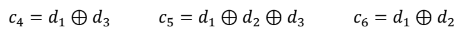

In [3]:
import numpy as np
from numpy import array


#Sabemos que k son la cantidad de palabras de d (Vector de datos)
#convertiremos en las n palabras de codigo de c (Vector de codigo) doonde se añaden bits redundantes

def blockencode(k):
    c4 = (k[0]+k[2])%2          # c4 = d1 ⊕ d3
    c5 = (k[0]+k[1]+k[2])%2     # c5 = d1 ⊕ d2 ⊕ d3
    c6 = (k[0]+k[1])%2          # c6 = d1 ⊕ d2
    n = array([c4,c5,c6])       # n = c4, c5, c6 Vector de datos dedundantes
    return array(n)

def blockdecode(n):
    P = array([[1,0,1],     #Matriz P
                  [1,1,1],
                  [1,1,0]])
    
    I = array([[1,0,0],        #Matriz Identidad 3x3
               [0,1,0],
               [0,0,1]])
    
    s =  np.concatenate((I, P))    
    c = array(n)
    rs = (np.matmul(c,s))%2
    if np.all((rs == 0)):
        print("No hay error")
        print("Mensaje original d = {}".format(c[0:3]))
    else:
        print("Error detectado...")
        for i in range(len(n)):
            if (rs == s[i]).all():
                c[i] = (c[i]+1)%2
                print("El error está en el bit {}".format(i+1))
                print("Mensaje corregido d = {}".format(c[0:3]))
                return        
        print("No se pudo corregir")
    return

In [4]:
d = array([0,1,0])
c = np.concatenate((d,blockencode(d))) #Crea el vector c

print("Mensaje original: ", d)
print("Mensaje codificado: ", c)

Mensaje original:  [0 1 0]
Mensaje codificado:  [0 1 0 0 1 1]


In [5]:
# Deencode mensaje recibido sin error
print("Mensaje original: ", d)
print("Mensaje a deencode: ", c)
blockdecode(c)

print()

# Deencode mensaje recibido con 1 error
print("Mensaje original: ", d)
err = np.copy(c)
bit = 3
err[bit] = (err[bit]+1)%2 # cambio de bit
print("Mensaje a deencode: ", err)

blockdecode(err)

Mensaje original:  [0 1 0]
Mensaje a deencode:  [0 1 0 0 1 1]
Error detectado...
No se pudo corregir

Mensaje original:  [0 1 0]
Mensaje a deencode:  [0 1 0 1 1 1]
Error detectado...
El error está en el bit 6
Mensaje corregido d = [0 1 0]
